In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

In [2]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import plotly.express as px

In [3]:
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style='whitegrid')

In [4]:

calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
 exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exercise_df = exercise.merge(calories , on = "User_ID") #merge is use to merge two dataset into one 
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
print("These dataset have ", exercise_df.shape[0] ,"instances and", exercise_df.shape[1]," columns")

These dataset have  15000 instances and 9  columns


In [8]:
print("Columns : ")
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  print("\t" , i + 1 , "." ,  column)

Columns : 
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


In [9]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


* As we can see, the table above shows the `Descriptive Statistics`(for example `centeral tendency`) of each column or feature.

* For example for `Age` column.%25 of the data lie between 20 and 28, anohter %25 lie between 28 and 39, and so on.The box plot shows the exact concept that I just mentioned.

* The outliers are shown with dots in box plots, which we will discuss about them in the next section.

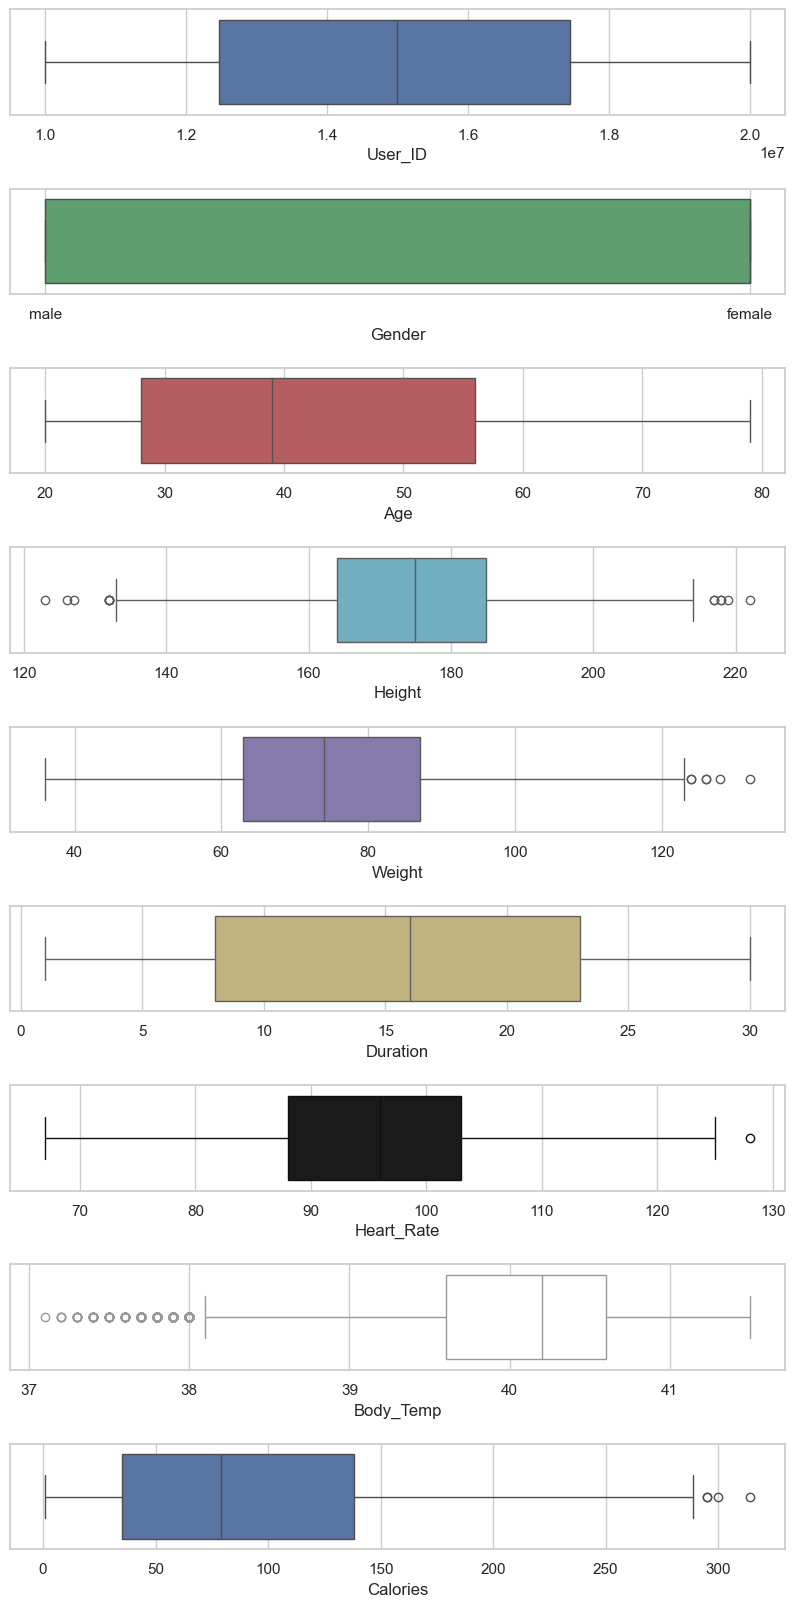

In [10]:
#This variable is used to decide the color of the plot(Example: 'b' = Blue, likewise 'g' = Green)
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']

#Making 9 subplots to show the data
fig1 , axes = plt.subplots(len(exercise_df.columns) , 1 , figsize = (10 , 20))

#wspace is use for width and hspace is use for height
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  try:
    sns.boxplot(data = exercise_df , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

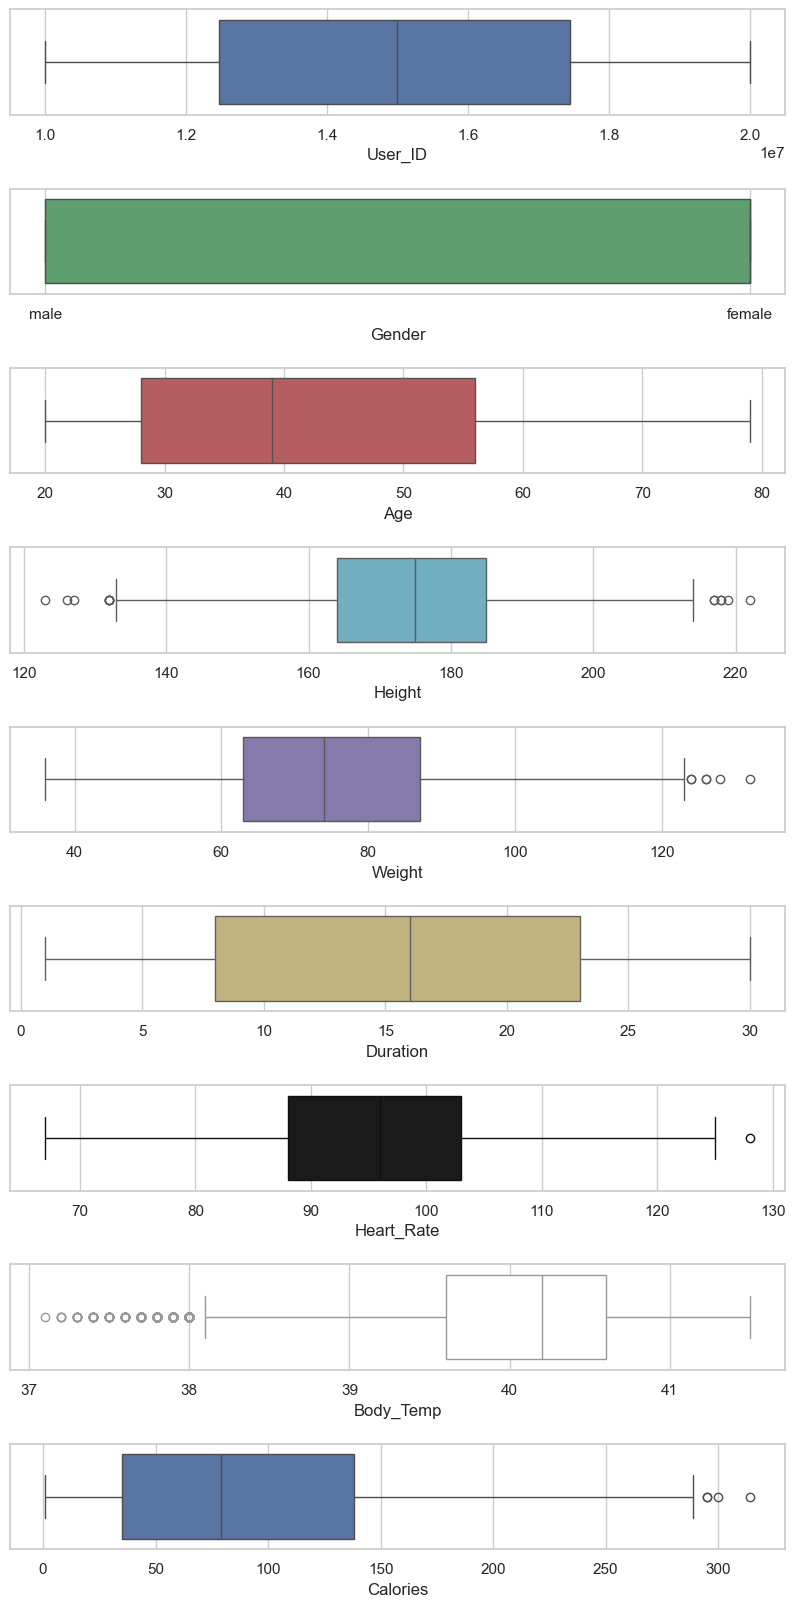

In [11]:
#This variable is used to decide the color of the plot(Example: 'b' = Blue, likewise 'g' = Green)
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']

#Making 9 subplots to show the data
fig1 , axes = plt.subplots(len(exercise_df.columns) , 1 , figsize = (10 , 20))

#wspace is use for width and hspace is use for height
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  try:
    sns.boxplot(data = exercise_df , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

In [12]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


* For a increasing the acuracy of we have to make sure that the data is in `numeric` form and there should be `no null value`.

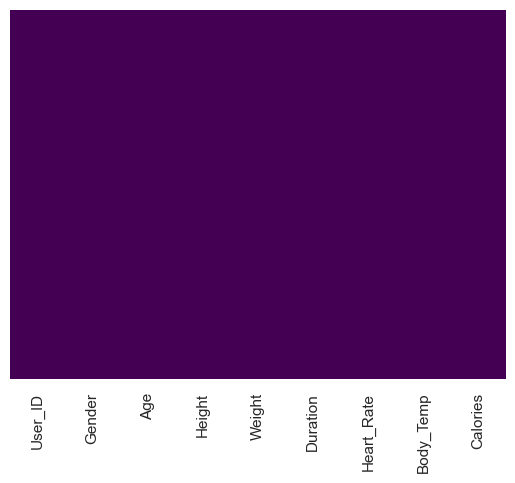

In [13]:
sns.heatmap(exercise_df.isnull() , yticklabels = False , cbar = False , cmap = "viridis");

* As we can see, fortunately, this dataset does not have any null/NaN values, which is good and it is not necessary to do extra manipulations(for instance imputation , dropping or filling NaN values etc.) with this dataset

### Drop Duplicates

Let assure that the dataset does not contain the duplicate User_Id

In [14]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)    # Keeping the first example of duplicates in 'User_ID' column.
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


* Luckily there is no duplicate value or duplicate User_Id in the dataset
* As we can see the shape of dataset before and after dropping duplicates is the same.It is a good sign, because we do not need to be worry about Data Leakage.

* Now we will drop the unnecessary column which can reduce the efficiency of our model
* and that column is User_Id column

In [15]:
exercise_df.drop(columns = "User_ID" , inplace = True)

In [16]:
exercise_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
exercise_train_data , exercise_test_data = train_test_split(exercise_df , test_size = 0.2 , random_state = 1)
print("Shape of training data : " , exercise_train_data.shape)
print("Shape of test data : " , exercise_test_data.shape)

Shape of training data :  (12000, 8)
Shape of test data :  (3000, 8)


### Dataset's Distribution
One of the main criterions that whether we will be able to deploy our model into production or not, is that<b> the distribution of features for both training set and test set must be similar.</b>This is because the model is fitting on the training set and the model keeps in mind the training set patterns.When the distribution of test set is different from the training set it means that the model can not predict very well on test set examples and unlike the training set accuracy, the testing set accuracy will be low.This is because, at first, we have to see and compare the distributions for both test set and training set and check whether both have the same distribution or not.

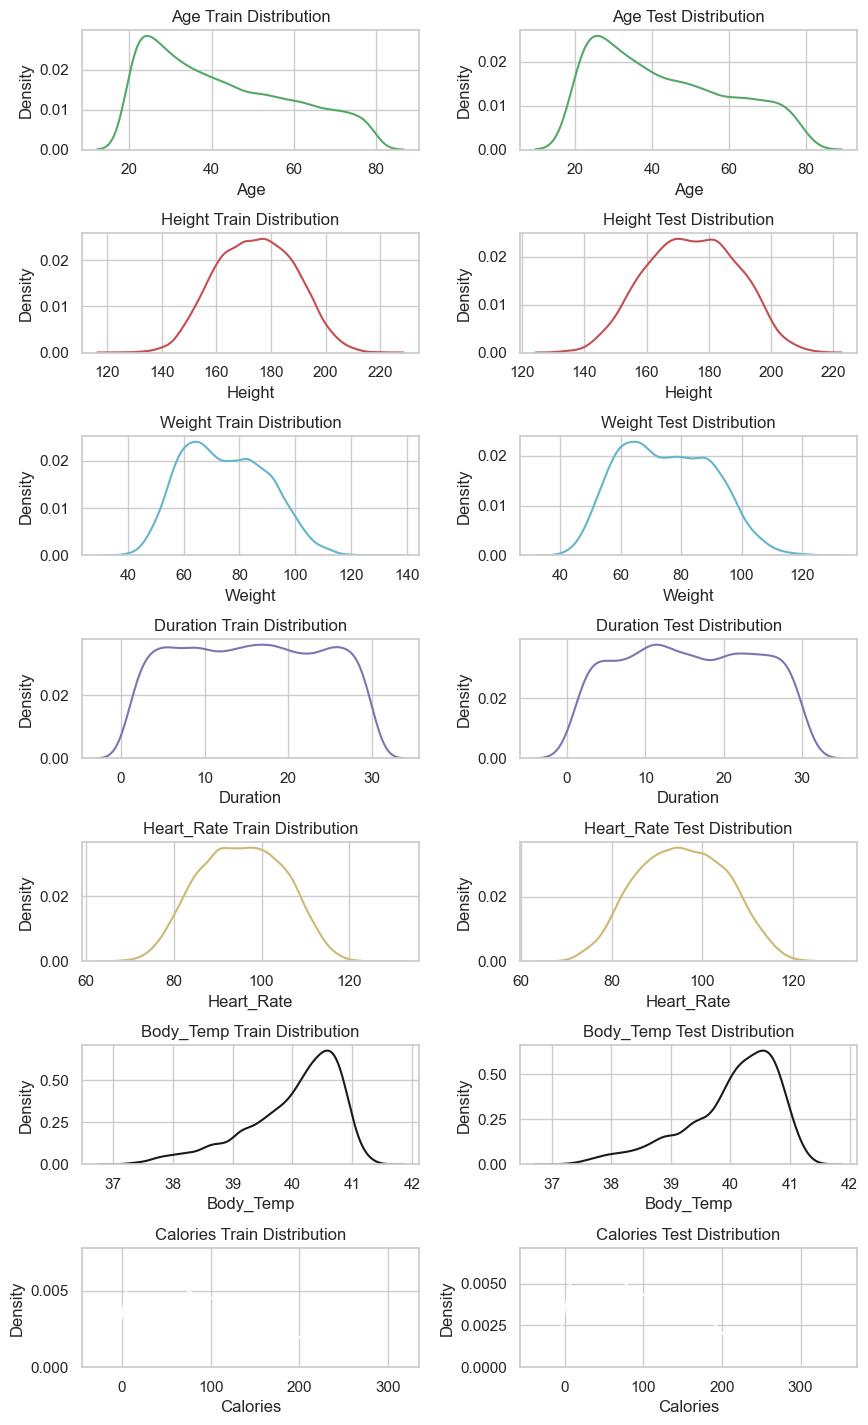

In [18]:
#This variable is used to decide the color of the plot(Example: 'b' = Blue, likewise 'g' = Green)
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_train_data.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension

#The zip function combines a range of indices, the column names, and their corresponding colors
#If an error occurs (e.g., if a column cannot be plotted), the corresponding axes are removed from the figure.

for i , column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Train Distribution")
    sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

for i , column , color in zip(range(1 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Test Distribution")
    sns.kdeplot(data = exercise_test_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

In [47]:
#The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, 
#respectively:
sns.pairplot(exercise_train_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender");
     

KeyError: "['Weight', 'Height', 'Gender'] not in index"

In [ ]:
print('Minimum age in dataset is : ' , exercise_train_data["Age"].min())
print('Maximum age in dataset is : ' , exercise_train_data["Age"].max())

### Exploratary Data Analysis(EDA)
As we can see the oldest person in dataset is 79 years old and the youngest is 20 years old.What we want to do is divide this range of ages into several named ranges.In other words we want to convert the continuous column into categorical column.
The ranges are:<p>
`Young`[20,40]<p>
`Middle Aged`[40,60]<p>
`Old`[60,80]<break>

In [ ]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
exercise_train_data["age_groups"].head()

In [ ]:
exercise_train_data["age_groups"].value_counts()

In [ ]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_train_data , x = "age_groups");


* As we expected, there is a significant difference between in counts of different age groups.Most of the people of this dataset are **young**.The second is **middle-aged** and the third one is **old**.

Lets analyze how many kilocalories each age groups burned.We will do this with `box plot`.Because `box plot` has a intuitive graph that we can extract **Median** , **Interquartile Range** , **Outliers** and etc.Just like the picture below shows.

![alt text](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png "Box plot structure")


In [ ]:
fig = px.box(exercise_train_data , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

In [ ]:
fig = px.box(exercise_train_data , x= "Gender" , y = "Heart_Rate")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

In this section our purpose is combine the `Weight` column and the `Height` column values to perform a simple BMI calculation to classify individuals of this dataset into different groups according to their BMI value.

* The BMI(Body Mass Index) formula:


$BMI = \frac{Weight(kg)}{Height(m)^2}$

OR

$BMI = \frac{Weight(Ib)}{Height(in)^2}$


* The first formula will be used because the units for `Weight` and `Height` of this dataset is `kg` and `meter` in respect.

* According to [this page](https://en.wikipedia.org/wiki/Body_mass_index) we will classify instances according to below table:


|   Categoty                                       | from          | to    |
| -------------------------------------------------|:-------------:| -----:|
| Very severely underweight                        | --            |  15   |
| Severely underweight                             | 15            |  16   |
| Underweight                                      | 16            |  18.5 |
| Normal (healthy weight)                          | 18.5          |  25   |
| Overweight                                       | 25            |  30   |
| Obese Class I (Moderately obese)                 | 30            |  35   |
| Obese Class II (Severely obese)                  | 35            |  40   |
| Obese Class III (Very severely obese)            | 40            |       |

* We will classify examples according to above category:

In [ ]:
for data in [exercise_train_data , exercise_test_data]:         # adding BMI column to both training and test sets
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)

In [ ]:
# exercise_test_data["BMI"] = exercise_test_data["Weight"] / ((exercise_test_data["Height"] / 100) ** 2)
# exercise_test_data["BMI"] = round(exercise_test_data["BMI"] , 2)
# exercise_test_data.head()

In [ ]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") # converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column
exercise_train_data.head()

In [ ]:

ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

In [ ]:
ds = ds[(ds["Categorized_BMI"] == "Normal") | (ds["Categorized_BMI"] == "Overweight")]
#ds["Categorized_BMI"] = ds["Categorized_BMI"].astype("object")      

plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count")

In [ ]:
ds =exercise_train_data[["Gender" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender" , "Categorized_BMI"])
ds.columns = ["Gender" , "Categorized_BMI" , "Count"]
ds

In [ ]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "Gender")

In [ ]:
ds =exercise_train_data[["age_groups" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["age_groups" , "Categorized_BMI"])
ds.columns = ["age_groups" , "Categorized_BMI" , "Count"]
ds

In [ ]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "age_groups");

In [ ]:
fig = px.scatter(exercise_train_data , x = "Duration" , y = "Body_Temp" , size = "Calories")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

### [Pearson] Corelation
In this section we are going to analyze the correlations between each two features.The corrlation helps us to see , how much this two features' relationship is strong.If the the relationship of this two features is extremely strong(In other words the correlation is equall to 1 or -1 or close to this two numbers) we will face `collinearity` problem in our model.This means that not only this two feature will not help us to build a better model but also they cause some problems for our model.One way is to remove one of these feaures.


* We use pearson correlation method:



###### Covariance : **COV(X , Y)** = $$( \frac{\sum (X_{i} - \bar{X})(Y_{i} - \bar{Y})}{N}  )$$


###### Correlation : **CORR(X , Y)** = $$( \frac {COV(X , Y)}{\sigma_{X} \sigma_{Y}}  )$$

**Where** :

> 1. **Xi** : the values of the X-variable

> 2. **Yj** :  the values of the Y-variable

> 3. **X̄**  : the mean (average) of the X-variable

> 4. **Ȳ**  : the mean (average) of the Y-variable

> 5. **N**  : the number of data points

> 6. **σX** : the standard deviation of the X-variable

> 7. **σY** : the standard deviation of the Y-variable


So now lets plot the heatmap to analyze the correlation of features in this dataset.

In [ ]:
exercise_train_data.head()

In [ ]:
exercise_train_data

* This heatmap shows the correlation of both features in each cell.As we can see, many features have high correlation with another feature.One thing that has to be mentioned is that we have to drop useless features as many as possible.Because when we have many features the dimension of fearture space will be very large and when our model runs on this features it will be very slow.Because of that we have to drop some features.
* If two or more features have a high correlation with each other, we have to save one of them and drop the rest.In This way, we can improve model's efficiency.
* According to the heatmap, `Weight` and `Height` have a high correlation but we combined them and put them into the `BMI` column.So we can drop `Weight` and `Height` columns and save `BMI`.


In [ ]:
exercise_train_data = exercise_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_test_data = exercise_test_data[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first = True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first = True)

In [ ]:
X_train = exercise_train_data.drop("Calories" , axis = 1)
y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop("Calories" , axis = 1)
y_test = exercise_test_data["Calories"]

### Learning Curve
Learning Curve is a plot of the model's performance on the training set and the validation set as a function of the training set size(or the training iteration).One of the concepts that we get is the appropriate number of examples in training set size.If we take a look at the plot down below we will see that both training set size and validation set reached a plateau at a certain training set size(for example `800` training set size).It means that, with only `800` training set size we will get similar results with our model in compare to `1000` , `2500` or `5000` training set size.In other word increasing the training set size more than `800` will not improve the model's performance significantly.

In [ ]:
train_errors , val_errors = [] , []
def plot_learning_curve(model):
  for m in range(1 , 1000):
    model.fit(X_train[:m] , y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_test[:m])
    train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
    val_errors.append(mean_squared_error(y_test[:m] , y_val_predict))

  plt.plot(np.sqrt(train_errors) , "r-+" , linewidth = 2 , label = "Train")
  plt.plot(np.sqrt(val_errors) , "b-" , linewidth = 3 , label = "Val")
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Mean Squared Error")
  plt.xlim([0 , 1000])
  plt.ylim([0 , 25])
  plt.legend()
linreg = LinearRegression()
plot_learning_curve(linreg)

* As we can see , both curves plateaued at `800` in training set size axis.So it means if we increase the training set size more than `800` examples, model's performance will not be improved significantly.So we can reduce the training set size up to `800` examples without decreasing the model's performance.

* Another reason that the training set and validation set could not reach a lower MSE with more examples is that the dataset do not have enough informative features that our learning algorithm can leverage to build more performant model. 

### Building Regression Model

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
linreg_prediction = linreg.predict(X_test)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.

- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

[Source](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)

In [ ]:
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))

* So we have just implemented a simple `Linear Regression` to predict the calories burned with various parameters.Our RMSE for Linear Regression is about `12` which is acceptable.As just I said it is a simple model.We can reduce this errors with just replacing simple model with more complex model.

* In the next section I will be using the `RandomForestRegressor` algorithm which uses `bagging` method.
    ### RandomForestRegressor Algorithm
* In this section I will be using the `GridSearchCV` on of the cross-validation methods that we use for selecting `hyperparameters`.

* In this section , I will be using 3 hyperparameters for RandomForestRegressor algorithm which is `n_estimators` , `max_features` and `max_depth`.This will run on 5 splits and the split with highest accuracy will be picked.

**NOTE:** Sometimes running `GridSearchCV` is very time consuming in terms of `computational complexity`.So I have already run the GridSearchCV and put the best parameters into `RandomForestRegressor` directly and then run the model.So I commented out `GridSearchCV` and all of its dependencies.

In [ ]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

* As you can see, we get a slightly better  with `RandomForestRegressor` algorithm.result


In [ ]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

* As we can see the RMSE for `ReandomForestRegressor` is lower than `Linear Regresssion`'s RMSE.It means that we can make better predictions with RandomForestRegressor.

And now let's make a prediction to test model's performance.First we selected an example randomly and passed some numbers (close to feature values of the example) to the model and compared the results.

In [51]:
exercise_train_data.iloc[32]

Age               23
BMI            24.88
Duration        27.0
Heart_Rate     102.0
Body_Temp       40.3
Calories       140.0
Gender_male     True
Name: 5897, dtype: object

In [54]:
X_array = np.array([[19 , 24.4 , 40 , 120 , 36 , 1]]).reshape(1 , -1)
y_pred = random_reg.predict(X_array)
print("Clories Burned : " , round(y_pred[0] , 2))

Clories Burned :  182.93
